<a href="https://www.kaggle.com/code/joseprs421/credit-card-fraud-classification?scriptVersionId=154064773" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


# 1. Dataset Loading

In [2]:
pd.set_option('display.max_columns', None)
train_dir = os.path.join(dirname,"train.csv")
df = pd.read_csv(train_dir)
print(df.shape)
df.head()

(219129, 32)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


# 2. Exploration, data cleaning and pre-processing

In [3]:
# remove irrelevant column id
df = df.drop("id", axis=1)

We can easly print the information of the columns of our database, to **check datatypes**.

In [4]:
print(set(df.dtypes.to_list()),"\n")
df.info()

{dtype('int64'), dtype('float64')} 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219

It is interesting to look at **statistical metrics** that give us information on the numeric variable distribution. At a glance, if we look at the mean of the Class variable (our targuet) we can see the proportion of zeros and ones that we have. In this case, we have only **0.2% examples of fraud.**

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


## 2.1. Nulls check

In [6]:
# check id there are nulls
num_nulls = df.isna().sum()
print(len(num_nulls[num_nulls>0]), "nulls inside the dataframe")

0 nulls inside the dataframe


Since we have no nulls in our data and **all variables are numerical**, we can proceed to do the **exploratory data analysis**, and then check the **outliers**.

## 2.2. Outliers

In [7]:
from scipy import stats

remove_positions = set()
for column in df.columns:
    z_scores = stats.zscore(df[column])
    outliers = (abs(z_scores) > 3)
    positions = set(df[outliers].index)
    remove_positions.update(positions)


print(f'{len(remove_positions)} rows considered as outliers')

29498 rows considered as outliers


# 3. Exploratory Data Analysis

<Axes: xlabel='Class'>

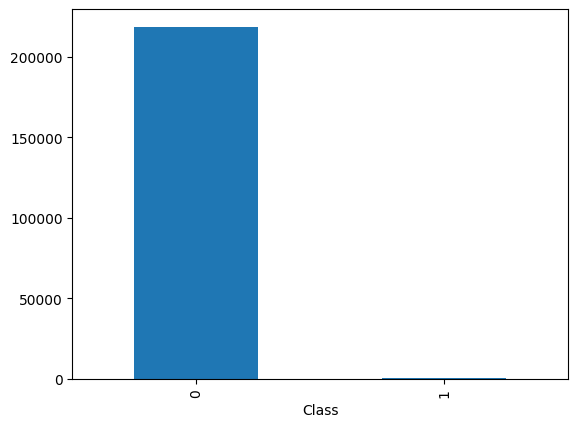

In [8]:
df["Class"].value_counts().plot(kind="bar")

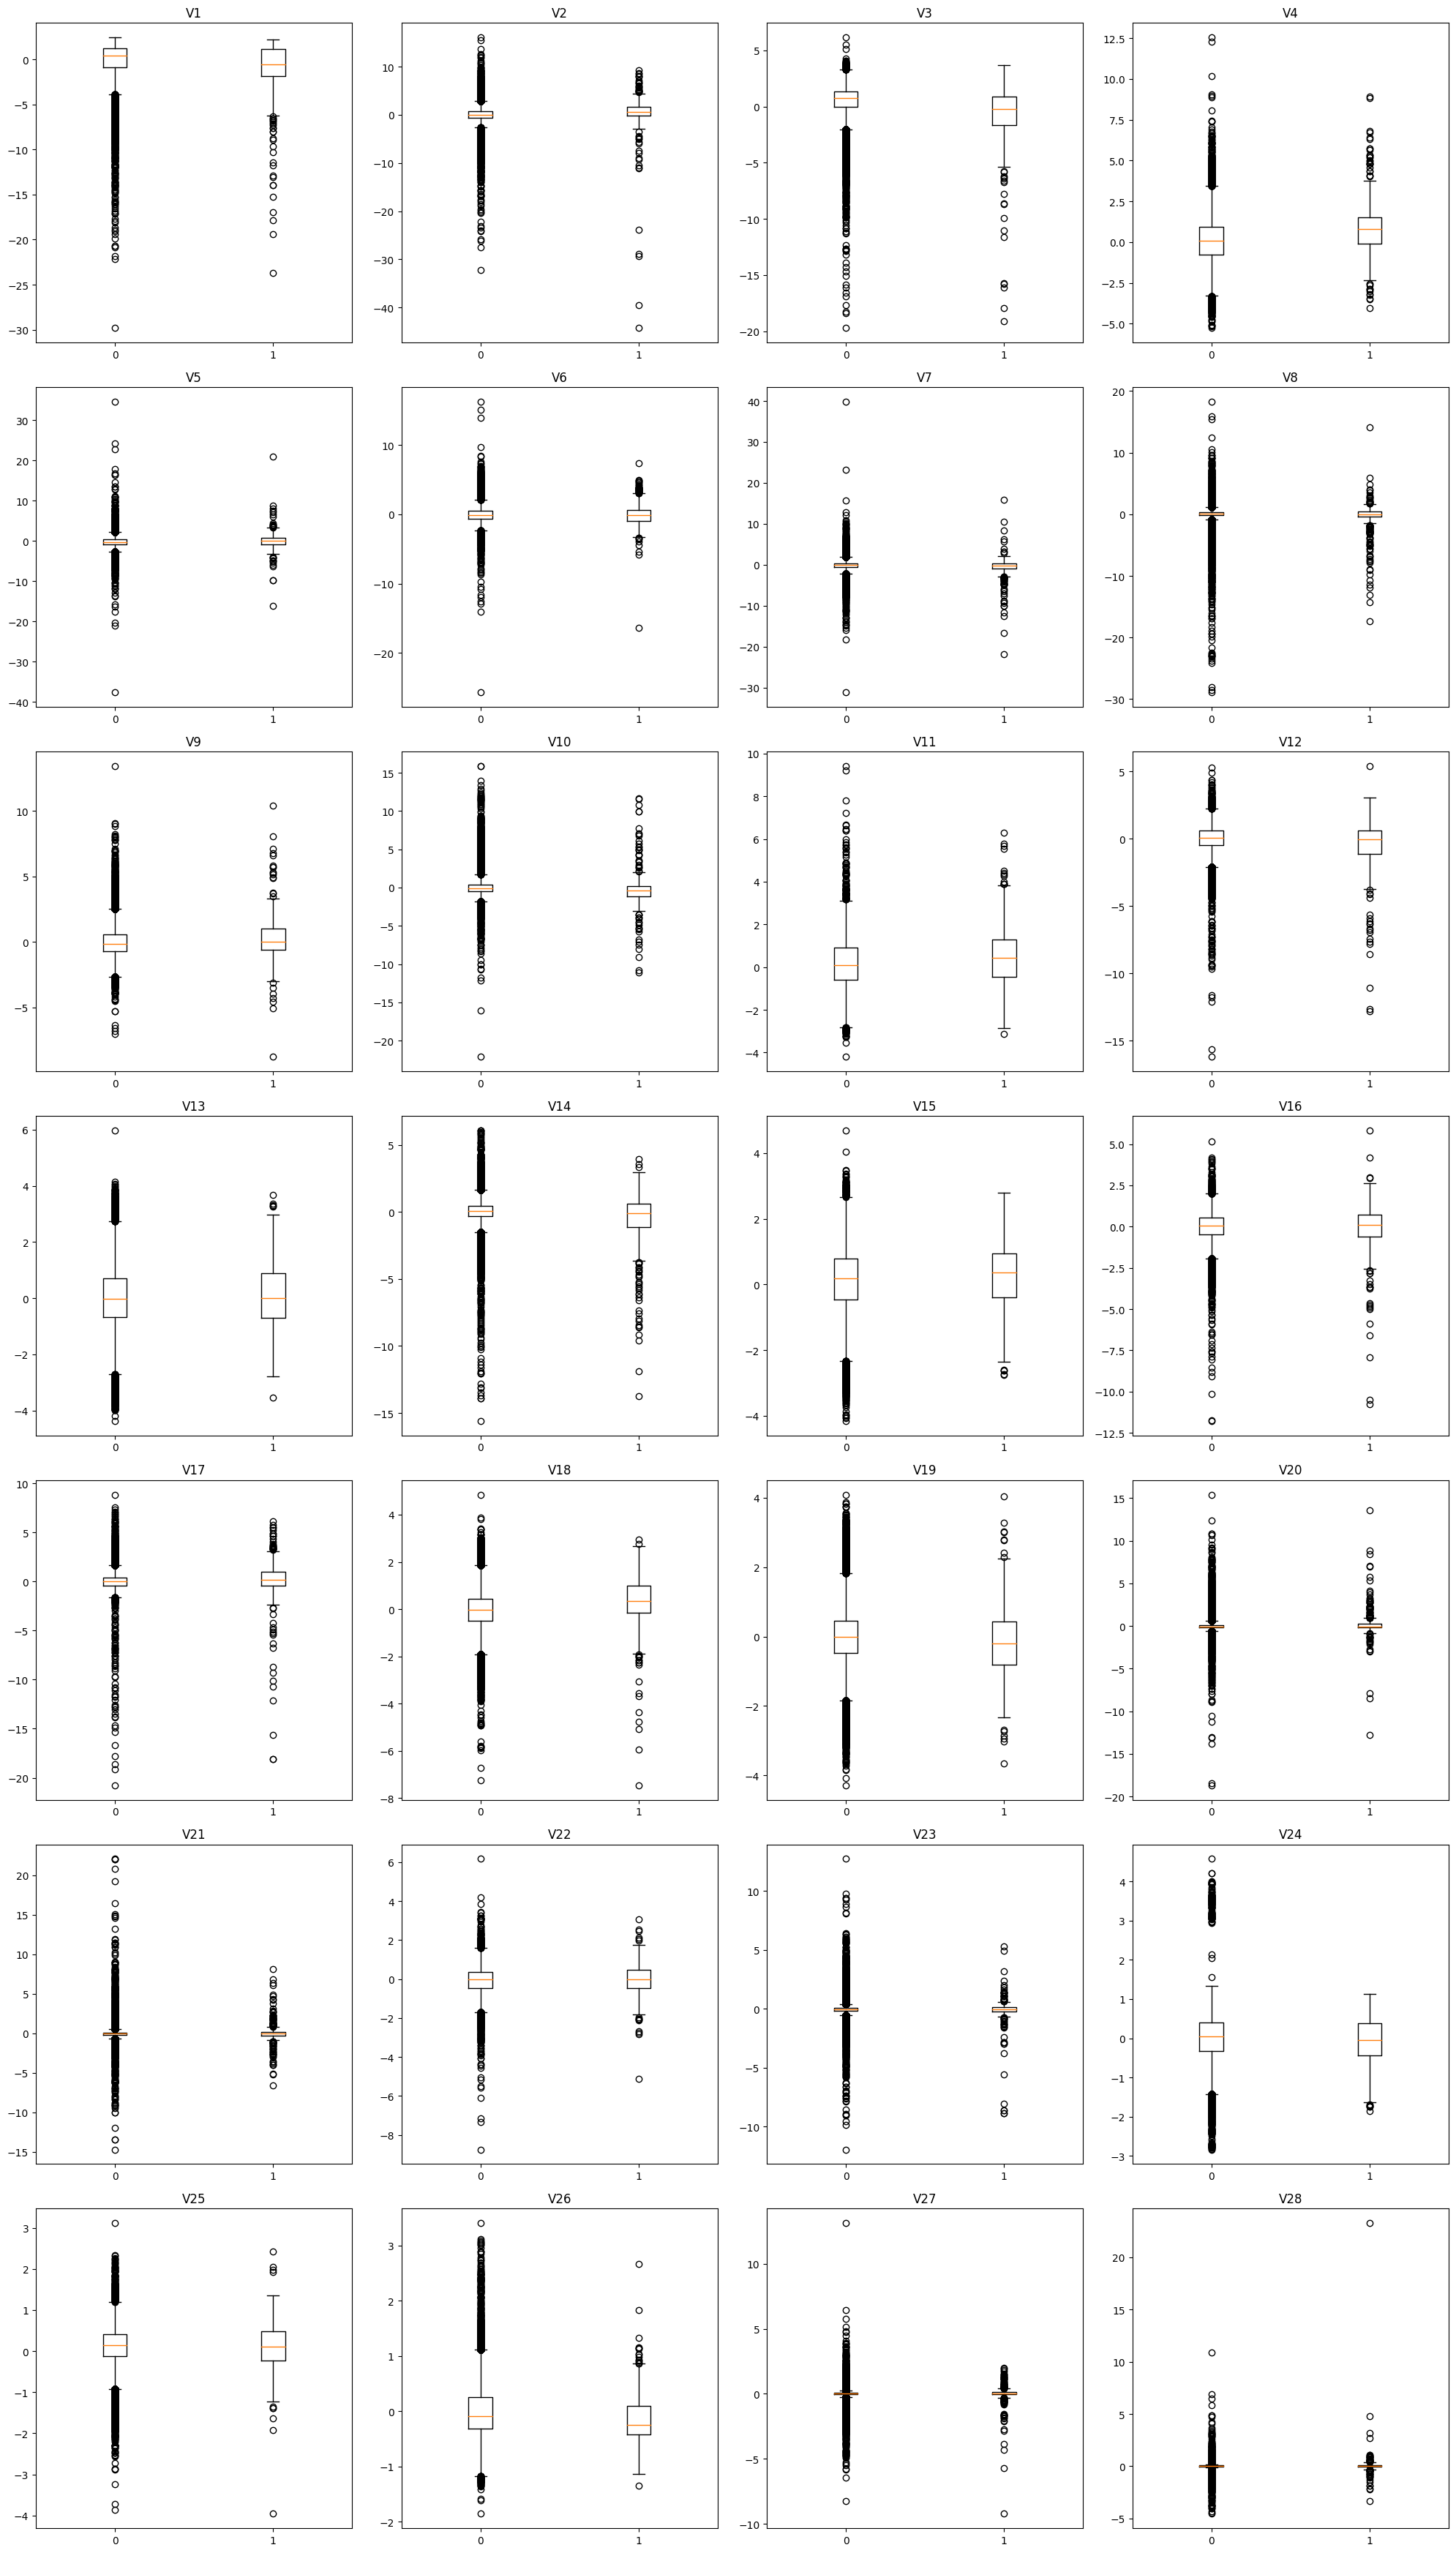

In [9]:
fig, ax = plt.subplots(7,4, figsize=(20,35))
ax = ax.ravel()

for idx, var in enumerate(df.columns[1:-2]):
    grouped = [group[var] for name, group in df.groupby("Class")]
    ax[idx].boxplot(grouped, labels=df['Class'].unique())
    ax[idx].set_title(f"{var}")

fig.tight_layout()
plt.show()

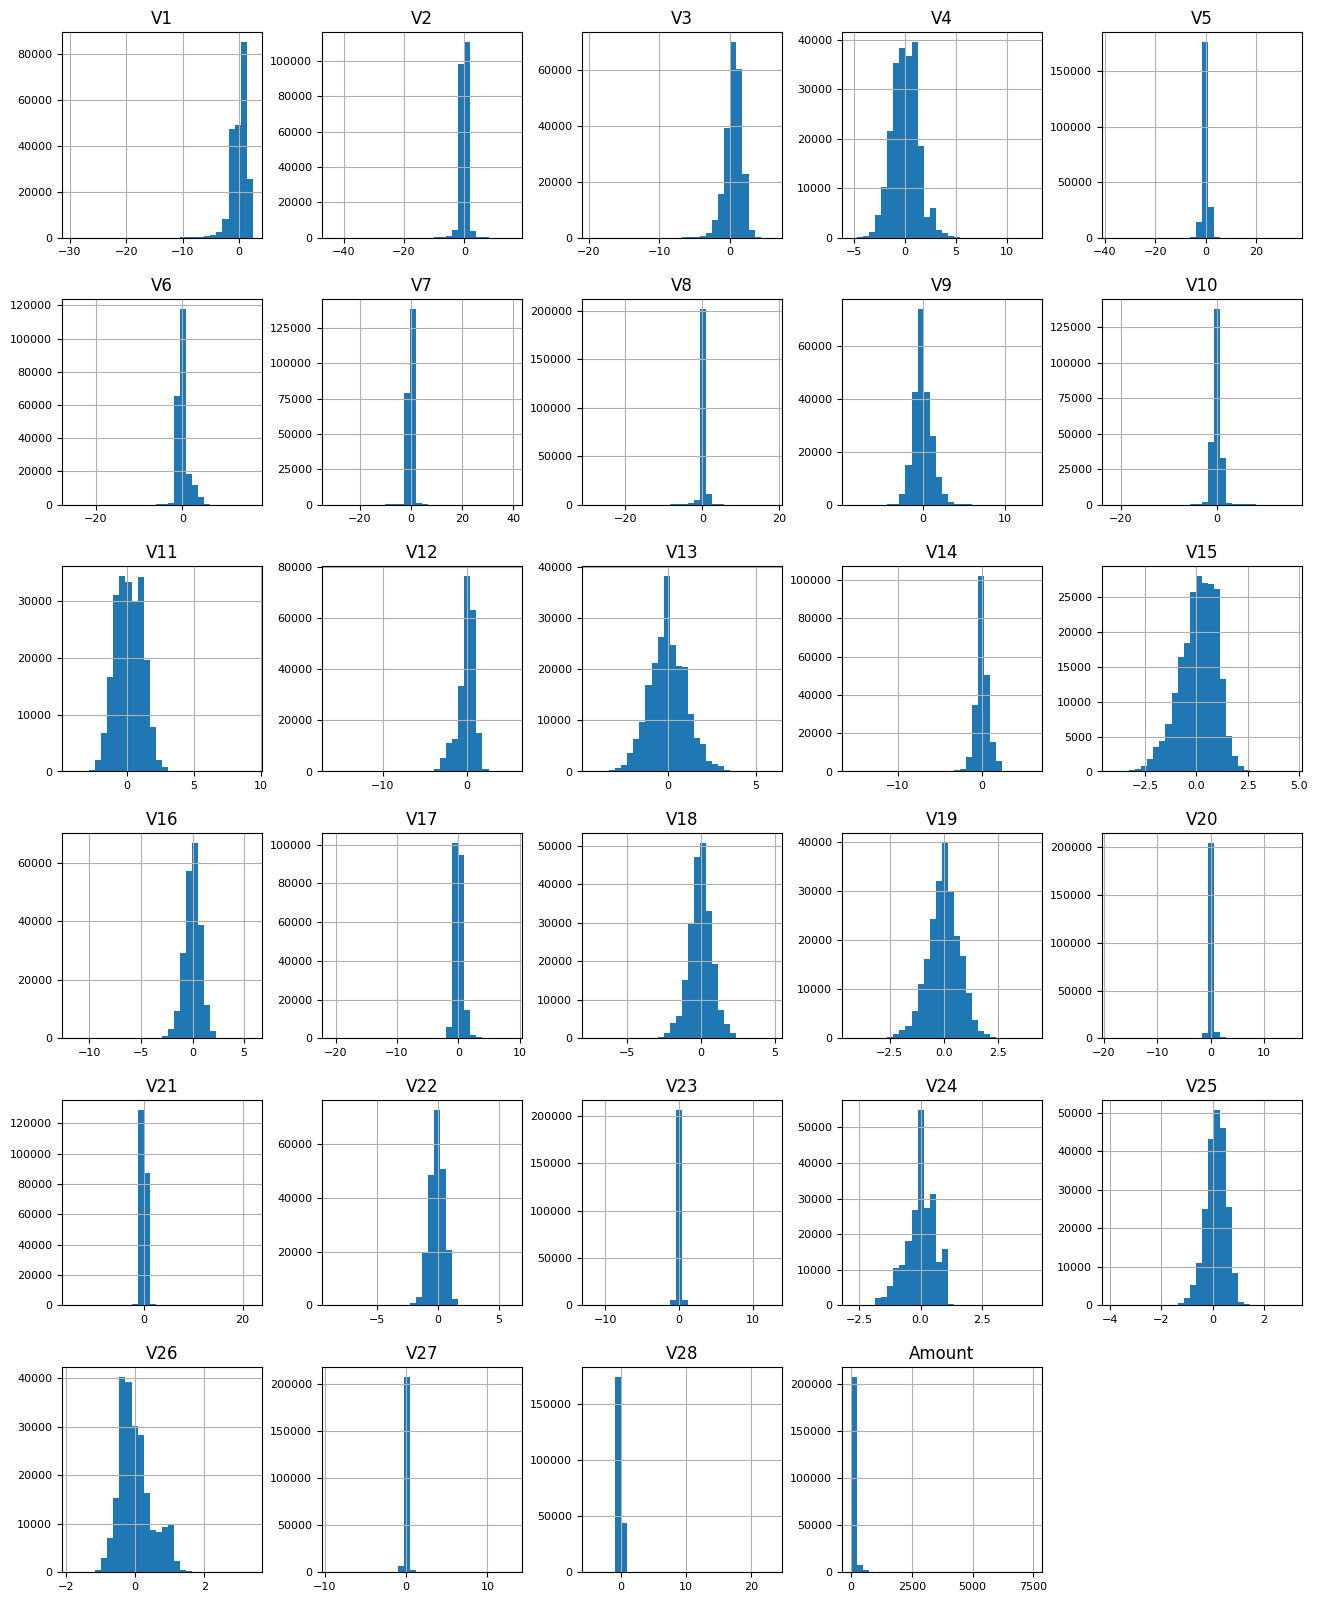

In [10]:
df[df.columns[1:-1]].hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

Although this correlation calculation only detects **linear correlations**, it can quickly indicate which variables are supposed to be related to each other. If we wanted non-linear correlations, **we could use the Mutual Information calculation**.

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.020667,0.017150,-0.217963,-0.047875,0.125820,0.019394,0.048767,-0.012936,0.007998,0.013524,-0.099561,0.037317,0.005465,-0.048009,-0.071565,-0.025925,-0.042839,0.085157,0.007170,-0.024983,0.036436,0.084565,0.030906,-0.015779,-0.134160,-0.044146,-0.000651,-0.025088,-0.006316,0.006889
V1,0.020667,1.000000,-0.301975,-0.237078,0.060526,-0.102238,0.076384,-0.209567,-0.095881,0.102082,0.114961,0.073522,-0.092507,0.056030,-0.000759,0.019710,0.018332,-0.004016,0.007560,-0.018232,-0.174613,-0.075561,-0.020109,-0.050983,-0.039148,0.256438,-0.000983,-0.001242,0.042269,-0.115158,-0.039251
V2,0.017150,-0.301975,1.000000,0.038095,0.146428,0.243717,-0.082277,0.292088,0.034800,0.010921,-0.105533,-0.007099,0.048717,0.054918,0.081159,0.080777,0.075279,-0.034897,0.017427,0.038556,-0.128416,-0.078165,-0.032399,0.022669,0.004399,-0.150464,-0.038489,0.057503,0.008125,-0.563721,0.012451
V3,-0.217963,-0.237078,0.038095,1.000000,0.058966,-0.215220,-0.130293,0.052614,-0.026637,-0.029154,-0.081315,-0.012618,0.083470,-0.082625,-0.092912,-0.106933,-0.111424,-0.045109,-0.076929,-0.017437,-0.035145,0.025458,0.156739,-0.030509,-0.008280,-0.153387,0.010866,0.049136,0.011003,-0.141140,-0.054008
V4,-0.047875,0.060526,0.146428,0.058966,1.000000,0.004642,-0.011888,0.096579,-0.002872,0.142303,-0.049087,-0.018310,0.132845,-0.043519,0.040658,-0.082493,-0.082537,0.064531,0.007153,-0.051216,0.020741,0.047631,0.054381,-0.008109,-0.048903,0.034450,-0.065007,-0.002757,0.021489,0.061920,0.027977
V5,0.125820,-0.102238,0.243717,-0.215220,0.004642,1.000000,0.331088,0.259276,0.051261,-0.000294,-0.179417,-0.016988,-0.053468,0.088330,0.057963,0.087929,0.095218,-0.191689,0.015377,0.051693,0.003181,-0.054922,-0.104722,-0.027975,0.047332,-0.007738,-0.048584,0.020277,-0.035526,-0.313477,0.010144
V6,0.019394,0.076384,-0.082277,-0.130293,-0.011888,0.331088,1.000000,-0.232957,0.274289,0.062514,0.006257,-0.057018,0.063181,-0.022692,-0.017279,-0.020519,0.005957,-0.106143,0.003907,0.091555,0.050650,0.009065,-0.015250,-0.027498,0.076797,0.103363,0.001758,0.018537,0.007954,0.076731,-0.004217
V7,0.048767,-0.209567,0.292088,0.052614,0.096579,0.259276,-0.232957,1.000000,-0.136652,-0.043469,-0.183903,0.001209,0.016123,0.043617,0.046692,0.047968,-0.041957,-0.126887,-0.035152,-0.005533,0.151273,-0.013802,-0.080196,-0.047698,-0.011064,-0.135634,-0.032033,-0.034344,0.016396,0.186247,-0.024589
V8,-0.012936,-0.095881,0.034800,-0.026637,-0.002872,0.051261,0.274289,-0.136652,1.000000,0.009300,-0.033509,-0.019785,0.093553,-0.094678,0.024361,-0.022854,0.031335,0.015503,0.009833,0.032125,-0.046418,0.005931,0.020232,0.017078,0.035852,-0.020029,0.011455,0.028751,0.011465,-0.080585,-0.037774
V9,0.007998,0.102082,0.010921,-0.029154,0.142303,-0.000294,0.062514,-0.043469,0.009300,1.000000,-0.335805,0.018908,-0.133194,0.049560,0.162879,-0.164841,-0.033894,0.019246,-0.003942,0.011800,0.040775,-0.011654,0.052760,0.013649,-0.007573,0.014042,0.078406,0.008854,-0.053040,-0.022752,0.015108


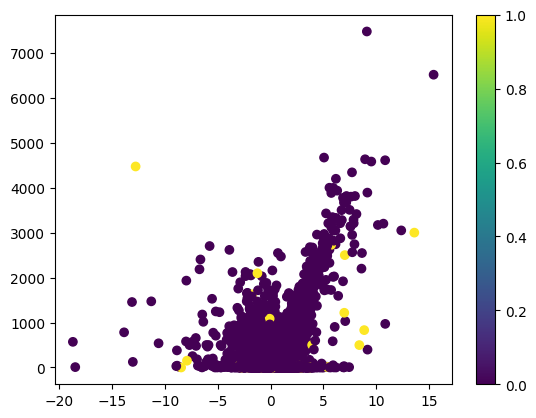

In [12]:
plt.scatter(df["V20"], df["Amount"], c=df["Class"], cmap='viridis')
plt.colorbar()
plt.show()

In [13]:
legal_df = df[df["Class"]==0]
fraud_df = df[df["Class"]==1]

legal_undersampled = legal_df.sample(fraud_df.shape[0]*2)
df_samp = pd.concat([legal_undersampled, fraud_df])

print("Fraud sample shape", fraud_df.shape)
print("Final sampled shape", df_samp.shape)

Fraud sample shape (469, 31)
Final sampled shape (1407, 31)


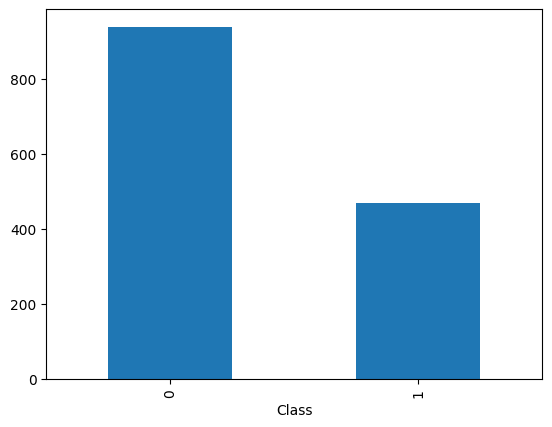

In [14]:
df_samp["Class"].value_counts().plot(kind="bar")
plt.show()

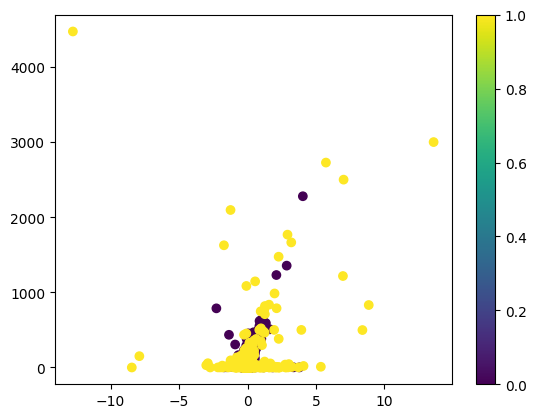

In [15]:
plt.scatter(df_samp["V20"], df_samp["Amount"], c=df_samp["Class"], cmap='viridis')
plt.colorbar()
plt.show()

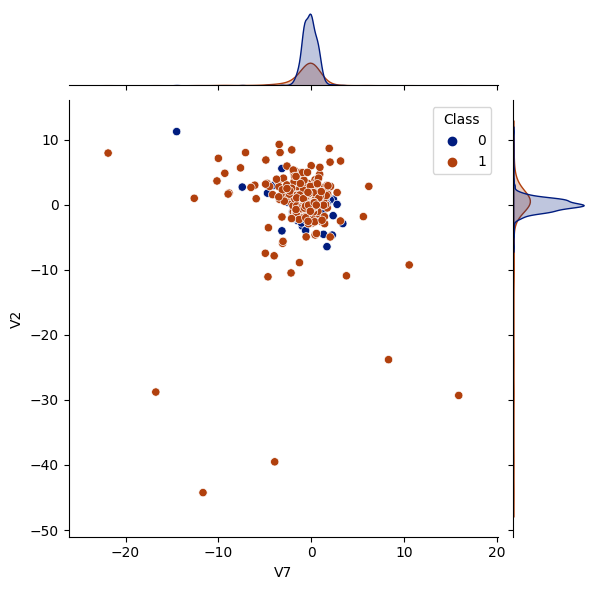

In [16]:
sns.jointplot(x='V7', y='V2',hue='Class', data=df_samp, palette = 'dark')
plt.show()

# 4. Model

In [17]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [18]:
# scale?
X = df_samp.drop('Class',axis=1)
y = df_samp['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle=True)

In [19]:
models = {
    "LGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "XGBoost": XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

evaluation = {'Model': [], 'Accuracy': [], 'AUC': []}

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    evaluation["Model"].append(model_name)
    evaluation["Accuracy"].append(accuracy)
    evaluation["AUC"].append(auc)
    

In [20]:
evaluation_df = pd.DataFrame(evaluation)
evaluation_df

,Model,Accuracy,AUC
0,LGBM,0.787234,0.812668
1,CatBoost,0.783688,0.834285
2,XGBoost,0.780142,0.810484
3,Random Forest,0.794326,0.839746
4,Support Vector Machine,0.659574,0.472614


In [21]:
model = CatBoostClassifier(silent=True)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8],
    'depth': [2, 4, 6, 8, 10],
    'l2_leaf_reg': [0.01, 0.02, 0.1],
    'iterations': [100, 200, 300],
    'border_count': [32, 64, 128],
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
search_result = random_search.fit(X_train, y_train, verbose=False)

best_model = random_search.best_estimator_

In [22]:
# 1
y_pred = best_model.predict(X_test)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
acc = accuracy_score(y_test, y_pred)
np.sum(y_pred)

54

In [23]:
# 2
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
custom_threshold = np.mean(y_pred_proba)
y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)
acct = accuracy_score(y_test, y_pred_custom_threshold)
np.sum(y_pred_custom_threshold)

79

In [24]:
# 3
y_pred_proba2 = best_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba2)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-5)
optimal_threshold = thresholds[f1_scores.argmax()]

y_pred_custom_threshold2 = (y_pred_proba2 >= optimal_threshold).astype(int)
acct2 = accuracy_score(y_test, y_pred_custom_threshold)
np.sum(y_pred_custom_threshold2)

126

In [25]:
print(acc, acct, acct2)

0.7730496453900709 0.74822695035461 0.74822695035461


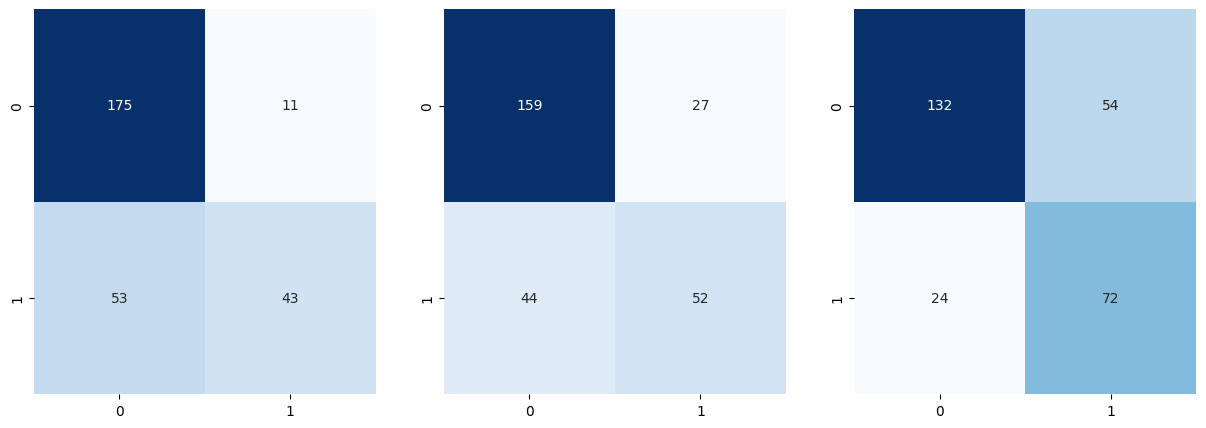

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred_custom_threshold)
conf_matrix2 = confusion_matrix(y_test, y_pred_custom_threshold2)

fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[2])
plt.show()

# 5. Test Model

In [27]:
test_dir = os.path.join(dirname,"test.csv")
test = pd.read_csv(test_dir)
test_id = test["id"]
print(test.shape)
test.head()

(146087, 31)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,0.220610,1.058325,-0.723363,-0.619241,-2.243711,-0.271429,2.007845,1.213534,0.282344,0.579121,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,0.483337,0.274519,-0.346514,-0.409519,-0.564673,-0.143855,1.334855,0.160901,-0.087356,-0.066264,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,1.626352,0.601148,-0.041610,0.432748,-0.527684,-0.543665,0.043896,0.058472,0.622667,0.010671,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,-1.225592,-0.869368,1.647638,1.138026,-0.258468,-0.361765,-1.253326,0.099479,-0.587702,1.207085,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,-0.341879,0.471628,0.637604,-0.592416,0.331702,-1.451799,0.096467,-0.853439,-0.462060,-0.267098,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [28]:
test = test.drop("id", axis=1)
print(set(test.dtypes.to_list()),"\n")

{dtype('float64')} 



In [29]:
test_predictions = best_model.predict_proba(test)[:,1]

In [30]:
result_dir = os.path.join(dirname,"sample_submission.csv")
result = pd.read_csv(result_dir)
result["id"] = test_id
result["Class"] = test_predictions
result.to_csv('submission.csv',index=False)